https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

# ***Meta Data***
- manufacturer - name of the car manufacturer
- model - name of the car model
- year - the year when the car was produced
- mileage - the number of miles the car has traveled since production
- engine - car engine
- transmission - type of the car's transmission
- drivetrain - type of the car's drivetrain
- fuel_type - type of fuel that the car consumes
- mpg - the number of miles a car can travel using one gallon of fuel (miles per gallon)
- exterior_color - car exterior color
- interior_color - car interior color
- accidents_or_damage - whether the car was involved in accidents
- one_owner - whether the car was owned by one person
- personal_use_only - whether the car was used only for personal purposes
- seller_name - name of the seller
- seller_rating - seller's rating
- driver_rating - car rating given by drivers
- driver_reviews_num - the number of car reviews left by drivers
- price_drop - price reduction from the initial price
- price - car price

# The data about used cars price, we want to know what fearur have an effect


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from   datasist.structdata import detect_outliers as do

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [5]:
df.isna().mean()*100


manufacturer            0.000000
model                   0.000000
year                    0.000000
mileage                 0.066396
engine                  1.974830
transmission            1.299582
drivetrain              2.829321
fuel_type               3.008433
mpg                    18.642262
exterior_color          1.162460
interior_color          7.476141
accidents_or_damage     3.177048
one_owner               4.131134
personal_use_only       3.261028
seller_name             1.127556
seller_rating          28.077093
driver_rating           4.150685
driver_reviews_num      0.000000
price_drop             46.185954
price                   0.000000
dtype: float64

# Data Cleaning

In [6]:
3# dealing with duplicated values 
df.duplicated().sum()

9145

In [7]:
# remove dupicated values 
df.drop_duplicates(inplace=True)

In [8]:
# drop column price drop
df.drop(columns='price_drop',inplace=True)

In [9]:
# Dealing with missing values
df.dropna(subset=['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
        'driver_rating', 'driver_reviews_num', 'price'],inplace=True)

In [10]:
# filing missing vlues in mpg and seller_rating columns 
df['mpg'].ffill(inplace=True)
df['seller_rating'].ffill(inplace=True)
df.dropna(inplace=True)

In [11]:
df.isnull().mean()*100

manufacturer           0.0
model                  0.0
year                   0.0
mileage                0.0
engine                 0.0
transmission           0.0
drivetrain             0.0
fuel_type              0.0
mpg                    0.0
exterior_color         0.0
interior_color         0.0
accidents_or_damage    0.0
one_owner              0.0
personal_use_only      0.0
seller_name            0.0
seller_rating          0.0
driver_rating          0.0
driver_reviews_num     0.0
price                  0.0
dtype: float64

In [12]:
## fuel_type
df['fuel_type']= df['fuel_type'].apply(lambda x : 'Gasoline' if x == 'Gasoline Fuel'else x )

In [13]:
# fix the type fo mpg column 
df['mpg'] = df['mpg'].apply(lambda x: x.split('-'))

In [14]:
def extract_mean(x):
    numbers = [float(num) for num in x]
    return sum(numbers) / len(numbers)

In [15]:
df['mpg']= df['mpg'].apply(extract_mean)

In [16]:
# remove the outlires from mileage 
idx =  do(df,0,['mileage'])
indx =df.loc[idx].index

In [17]:
df.drop(indx,inplace=True)

In [18]:
mile = df[df['mileage']<=10.0]
mile = mile[mile['year']!=2023].index
df['mileage']=df['mileage'].apply(lambda x : 53349.94 if x in mile else x)

In [19]:
# remove unknown in column drivetrain
ind = df[df['drivetrain']=='Unknown'].index

In [20]:
df.drop(ind,inplace=True)

In [21]:
# func to replace the frequant values with the original values
def rplace(x):
    if x in ['AWD','4x4','All-Wheel Drive','All Wheel Drive']:
        return 'All-wheel Drive'
    elif x in ['FWD','Front-Wheel Drive','Front Wheel Drive']:
        return 'Front-wheel Drive'
    elif x in ['4WD','Four Wheel Drive']:
        return 'Four-wheel Drive'
    elif x in ['RWD','Rear Wheel Drive']:
        return 'Rear-wheel Drive'
    else:
        return x

In [22]:
df['drivetrain'] = df['drivetrain'].apply(rplace)

In [23]:
# extract column age from column year
df['age']= 2023-df['year']
# drop column year we don't need any more 
# df.drop(columns='year',inplace=True)

In [24]:
### remove the ouliers in the column price
idx = do(df,0,['price'])
df.drop(df.loc[idx].index,inplace=True)


In [25]:
## drop values that less than 100 or equal
df.drop(df[df['price']<=100].index,inplace=True)

In [26]:
# make a data frame from value counts of Transmission column 
d = df['transmission'].value_counts().to_frame().reset_index()
d.head()


,index,transmission
0,6-Speed Automatic,123100
1,8-Speed Automatic,117265
2,Automatic CVT,93784
3,Automatic,65561
4,9-Speed Automatic,50779


In [27]:
# I try to take count of values that repeted less than 100 and store them in a list 
less_100 = d[d['transmission']<100]['index'].to_list()
df['transmission'].nunique()

776

In [28]:
# after convert the count of values that less than 100 to other 
df['transmission'] = df['transmission'].apply(lambda x : 'other' if x in less_100 else x)
df['transmission'].nunique()

50

In [1]:
[np.arange(10,200,20)]

NameError: name 'np' is not defined

In [29]:
# fix column mdodel 
df['model'].nunique()

8900

In [30]:
df['model'].str.strip().str.title().nunique()

8755

In [31]:
df['model']= df['model'].str.strip().str.title()


In [32]:
# fix column engine 
df['engine'].nunique()

3824

In [33]:
df['engine'].str.strip().str.title().nunique()

3782

In [34]:
df['engine'] = df['engine'].str.strip().str.title()
engine = df['engine'].value_counts().to_frame().reset_index()

In [35]:
lst= engine[engine['engine']<20]['index'].to_list()
df['engine']= df['engine'].apply(lambda u : 'other' if u in lst else u )

In [36]:
df['engine'].nunique()

751

In [37]:
df.shape

(576913, 20)

In [38]:
## getting the outliers in each numberic column 
id = do(df,0,['mpg','mileage'])
ind = df.loc[id]
len(ind)


40405

In [39]:
## drop the outlirs from these columns 
df.drop(ind.index,inplace=True)

In [40]:
### exterior_color
df['exterior_color'] = df['exterior_color'].str.lower().str.title()

In [41]:
exterior_color = df['exterior_color'].value_counts().to_frame().reset_index()
exterior_color

,index,exterior_color
0,Black,38722
1,White,28236
2,Gray,18966
3,Silver,15243
4,Summit White,11655
...,...,...
5371,Flame Red Clearcoat / Black Soft Top,1
5372,Patriot Blue Pearlcoat / Black Hard Top,1
5373,Green Clearcoat,1
5374,Red Rock Crystal Pearlcoat/Black Soft Top,1


In [42]:
lst = exterior_color[exterior_color['exterior_color']<=100]['index'].to_list()

In [43]:
df['exterior_color']= df['exterior_color'].apply(lambda x : 'other' if x in lst else x )
df['exterior_color'].nunique()

613

In [44]:
# interior_color
df['interior_color'] = df['interior_color'].str.lower().str.title()
interior_color = df['interior_color'].value_counts().to_frame().reset_index()
interior_color

,index,interior_color
0,Black,226406
1,Gray,36589
2,Jet Black,35314
3,Ebony,30904
4,Charcoal,22474
...,...,...
2947,London Tan/Jet,1
2948,Jet / Dove / Ivory,1
2949,Jet / Jet Red,1
2950,Lunar/Light Oyster,1


In [45]:
lst = interior_color[interior_color['interior_color']<=100]['index'].to_list()
df['interior_color']= df['interior_color'].apply(lambda x : 'other' if x in lst else x )
df['interior_color'].nunique()

247

# Univariate Analysis

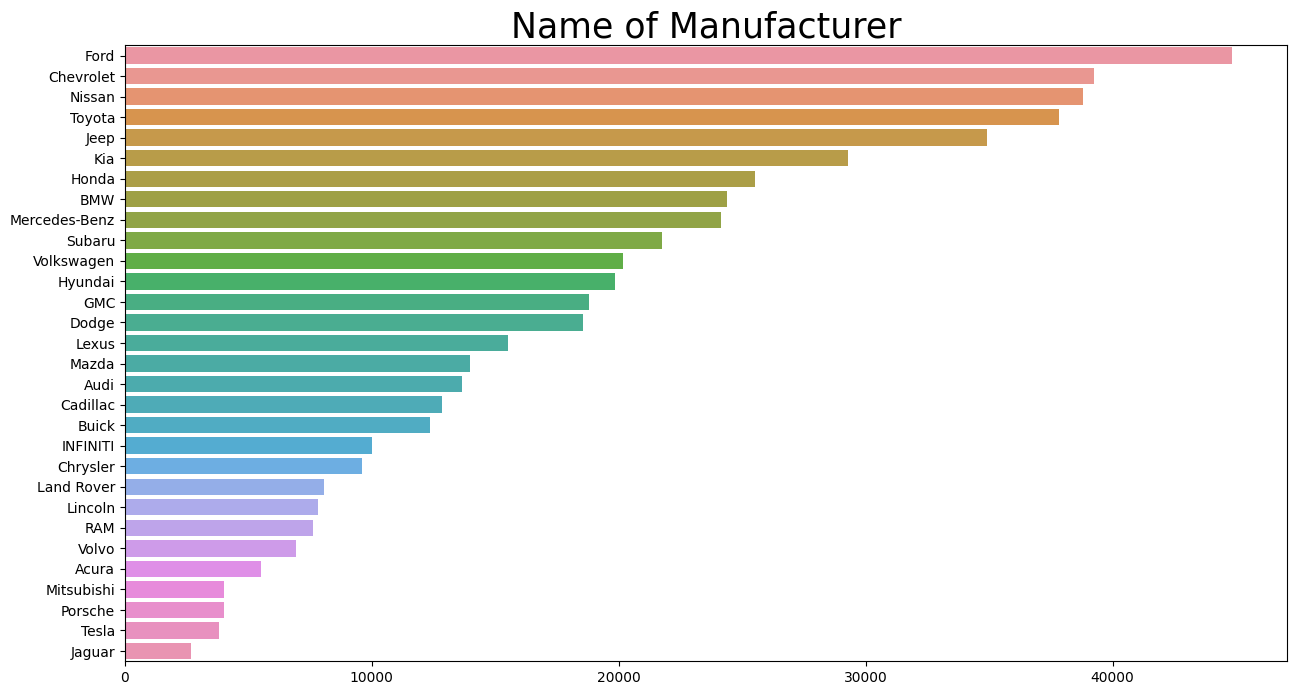

In [46]:
values = df['manufacturer'].value_counts().values
index = df['manufacturer'].value_counts().index
plt.figure(figsize=(15,8))
sns.barplot(y=index, x=values)
plt.title('Name of Manufacturer',fontsize=25)
plt.show()

In [47]:
# model
df['model'].nunique()

7918

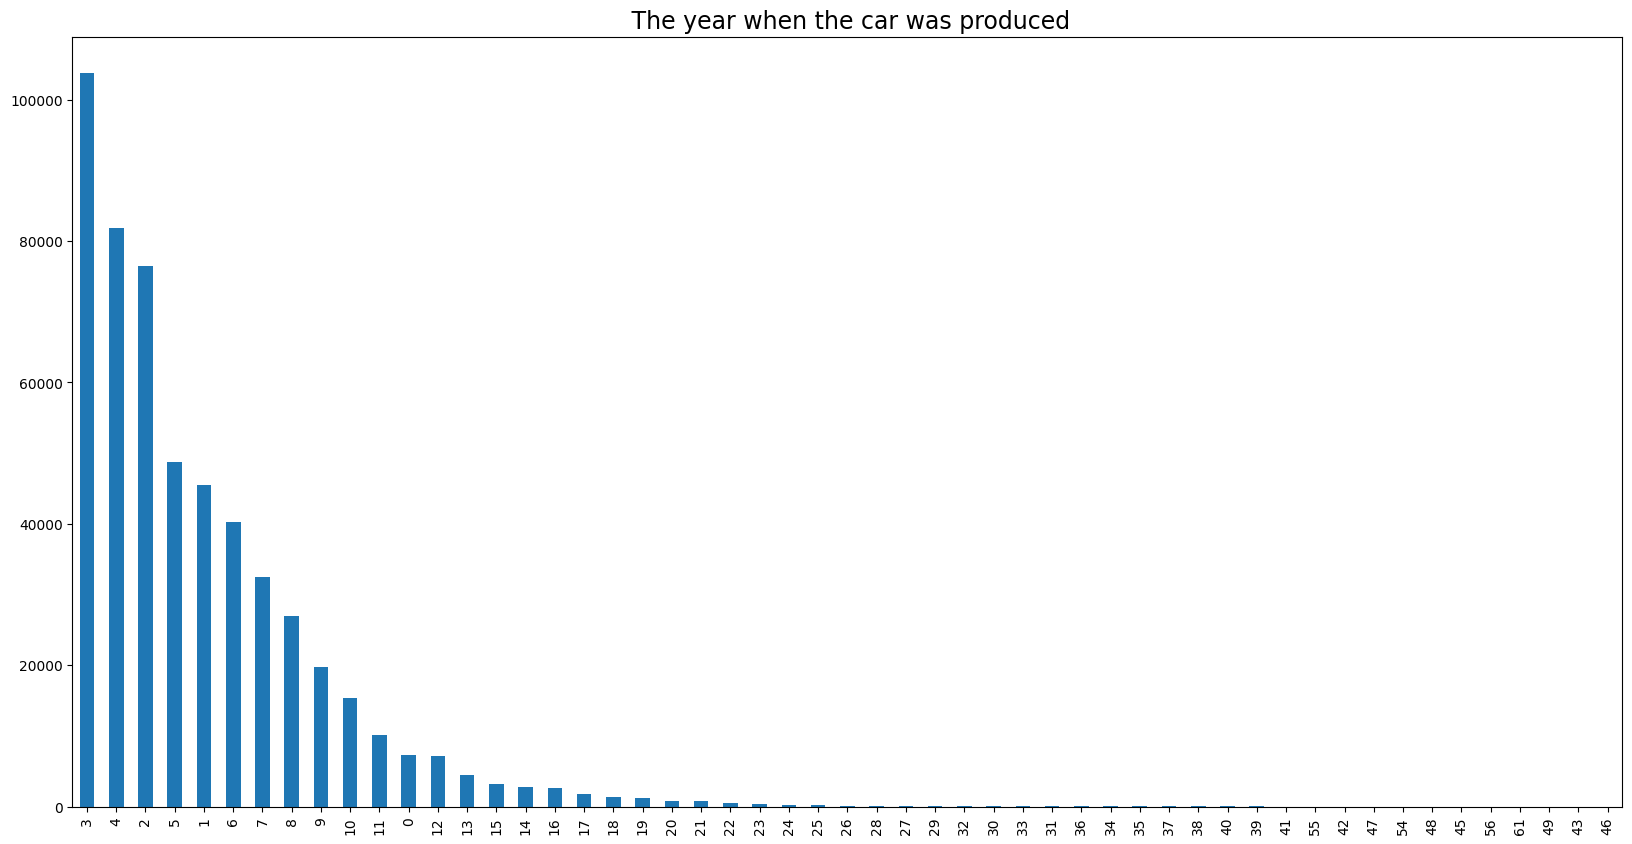

In [48]:
### age 

plt.figure(figsize=(20,10))
df['age'].value_counts().plot(kind='bar')
plt.title(' The year when the car was produced',fontsize=17);

- most frequant years are from 2019 to 2021

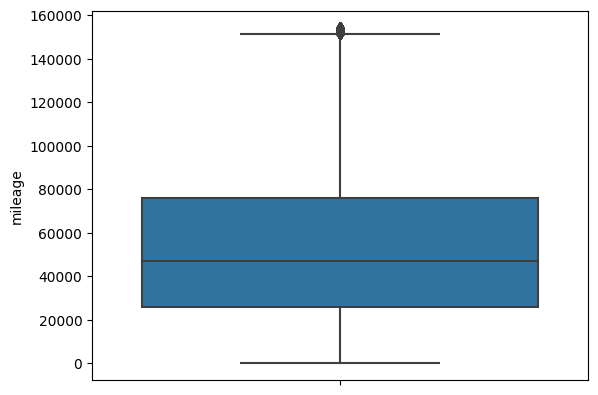

In [49]:
## Mileage
sns.boxplot(y=df['mileage']);

In [50]:
### engine 
df['engine'].nunique()

726

In [51]:
### exterior_color 
df['exterior_color'].nunique()

613

In [52]:
### transmission
df['transmission'].value_counts()[:20]

8-Speed Automatic                    114801
6-Speed Automatic                    110567
Automatic CVT                         84959
Automatic                             58820
9-Speed Automatic                     50668
10-Speed Automatic                    22919
5-Speed Automatic                     15865
7-Speed Automatic                     13895
7-Speed Automatic with Auto-Shift     11813
6-Speed Manual                        11531
4-Speed Automatic                      7522
1-Speed Automatic                      7051
other                                  4247
6-Speed Automatic with Auto-Shift      4163
8-Speed Automatic with Auto-Shift      3044
5-Speed Manual                         2528
Manual                                 2411
Variable                               1517
IVT                                     726
6-Speed                                 700
Name: transmission, dtype: int64

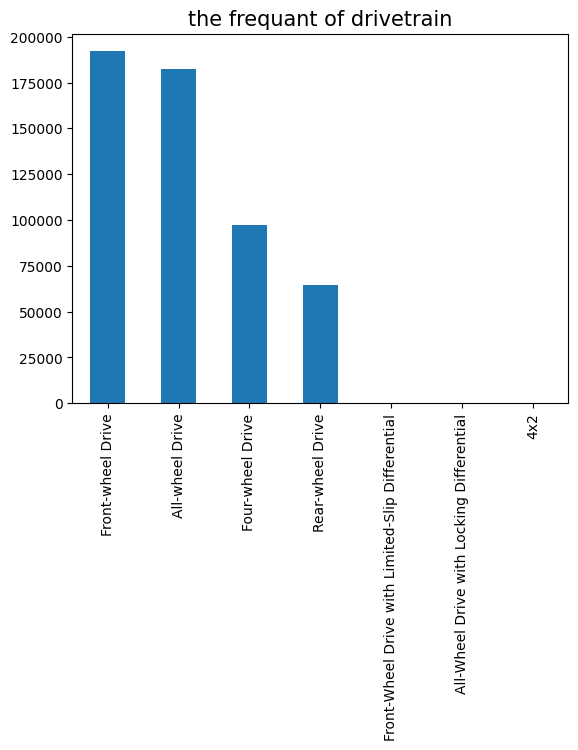

In [53]:
plt.title('the frequant of drivetrain',fontsize=15)
df['drivetrain'].str.strip().value_counts().plot(kind='bar');

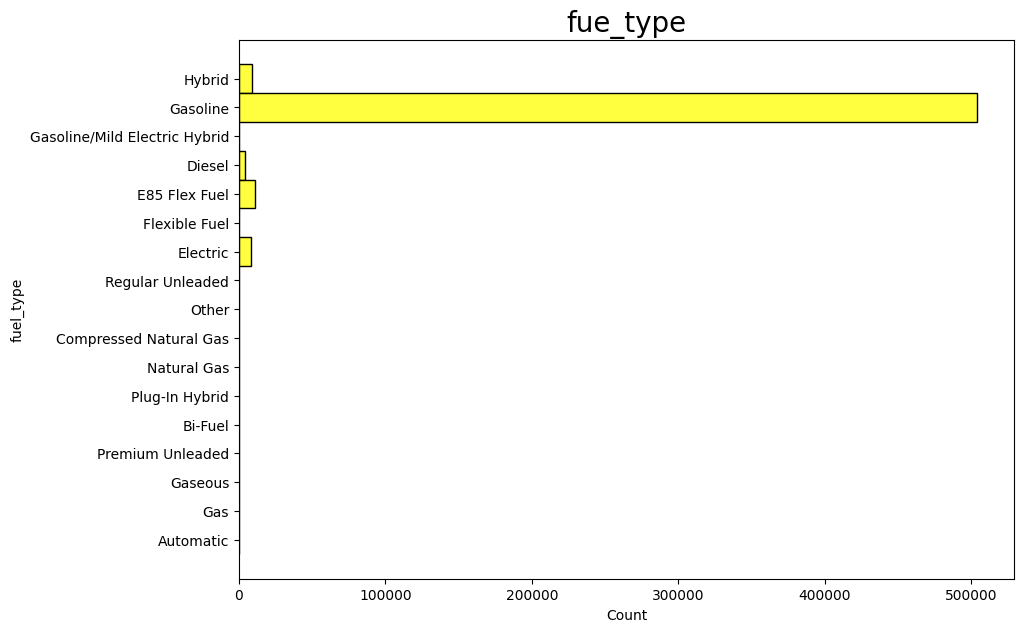

In [54]:
plt.figure(figsize=(10,7))
sns.histplot(y= df['fuel_type'],color='yellow')
plt.title('fue_type',fontsize=20);


- most of our vehicles use Gasoline fuel
- there are som cars use elctric 

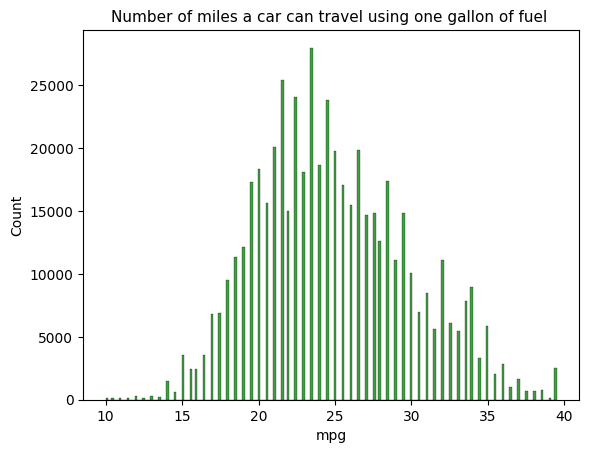

In [55]:
sns.histplot(df['mpg'],color='g')
plt.title('Number of miles a car can travel using one gallon of fuel ',fontsize=11);

- most frequant mpg is from 18 to 30

In [56]:
## number of unique colors in  exterior_color
df['exterior_color'] = df['exterior_color'].str.strip().str.title()
df['exterior_color'].nunique()

613

In [57]:
# number of unique colors in interior_color
df['interior_color'] = df['interior_color'].str.strip().str.title()
df['interior_color'].nunique()

246

In [58]:
# how many accidents for each car 
df['accidents_or_damage'].value_counts().to_frame().reset_index()

,index,accidents_or_damage
0,0.0,407736
1,1.0,128772


- 23% from our dataset did accident before and rest of our data are not 

In [59]:
(df['one_owner'].value_counts(normalize=True)*100).to_frame().reset_index()

,index,one_owner
0,1.0,55.85173
1,0.0,44.14827


In [60]:
df['personal_use_only'].value_counts(normalize=True)*100

1.0    66.32725
0.0    33.67275
Name: personal_use_only, dtype: float64

# who are top 10 sallers  

In [61]:
## saller name 
df['seller_name'].value_counts()[:10]

East Coast Auto Source              553
Adams North Charlotte               524
Automotive Avenues                  515
A Better Way Wholesale              492
Off Lease Only Orlando              441
HGreg.com Orlando                   401
Shelor Motor Mile                   400
Auto Boutique                       377
Donohooauto LLC                     367
Westgate Chrysler Jeep Dodge Ram    355
Name: seller_name, dtype: int64

<Axes: xlabel='seller_rating', ylabel='Count'>

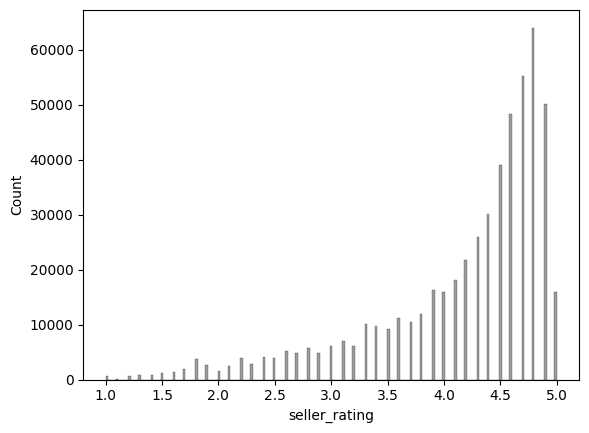

In [62]:
## saller rating
sns.histplot(df['seller_rating'],color='gray')

<Axes: xlabel='driver_rating', ylabel='Count'>

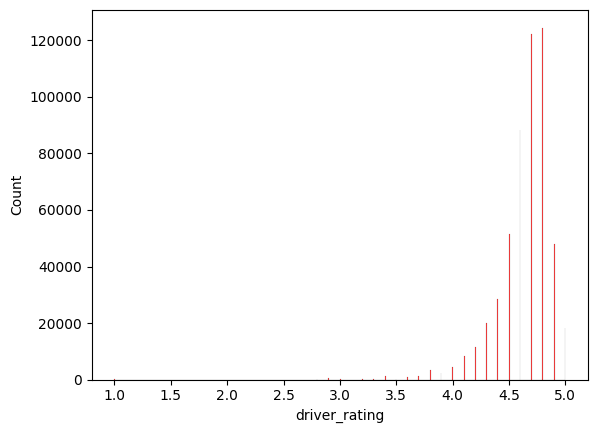

In [63]:
## driver rating
sns.histplot(df['driver_rating'],color='r')

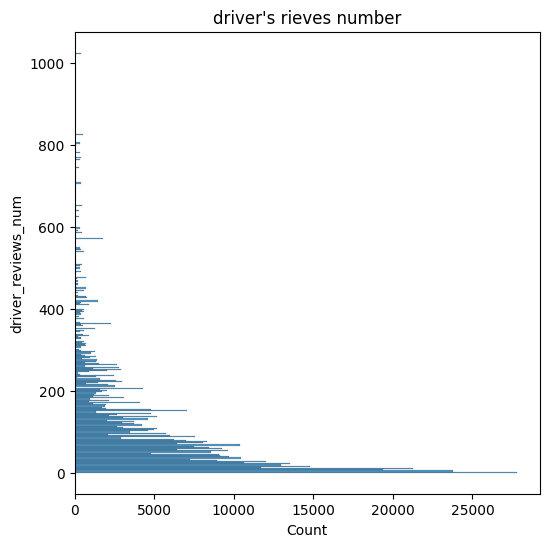

In [64]:
## number of driver's rating 
plt.figure(figsize=(6,6))
sns.histplot(y=df['driver_reviews_num'])
plt.title("driver's rieves number");

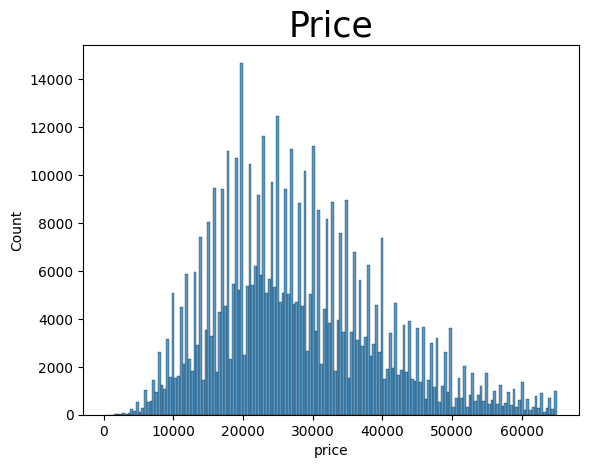

In [65]:
# the column of the price
sns.histplot(df['price'])
plt.title('Price',fontsize=25);

In [ ]:
# df.select_dtypes('O')

In [ ]:
df.drop(columns=['seller_name'],inplace=True)

In [ ]:
df.to_csv('new_data_cars.csv',index=False)